In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd


In [9]:
df = gpd.read_file("data/arctic_communities.geojson")
df.head(2)

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."


a. Individually, write down high-level steps on how you would explore and wrangle the data to produce the updated map. Do not code anything yet.

- use .dtypes to see the data type of each column
- df.geom_type
- df.crs


b. Discuss your high-level steps with your team. What do you see as potential challenges to implementing your plan?

- 

In [10]:
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

This function shows the data type of each spacial atribute. This output shows that we have multipolyons and polygons

# Create an if-else statement that:

prints “Multiple feature types:” followed by the unique geometry types (no repetition) in the geodataframe if not all the features are polygons, and

prints “All features are:” followed by the unique geometry type if all the features in the geodataframe have the same geometry type.


In [31]:
unique = df.geom_type.unique()

if len(unique) != 1:
    print(f"Multiple feature types:{unique}")
else:
    print(f"All features are:{unique}")
    

Multiple feature types:['MultiPolygon' 'Polygon']


In [32]:
def check_polygons(unique):
    if len(unique) != 1:
        print(f"Multiple feature types:{unique}")
    else:
        print(f"All features are:{unique}")

In [37]:
df = df.explode(index_parts = False)

In [38]:
df.geom_type.unique()

array(['Polygon'], dtype=object)

In [50]:
df.iloc[0].column["geometry"]

AttributeError: 'Series' object has no attribute 'column'

In [ ]:
Use the bounds attribute for shapely Polygons to select the southern-most bound of the first polygon in df.

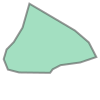

In [52]:
first_row = df.iloc[0]
first_row["geometry"]

In [55]:
from shapely import LineString, Point, Polygon

In [65]:
first_row["geometry"].bounds

(-132.948046875, 56.511035156249996, -132.56796875, 56.794775390625)

Create a function min_y that receives a single row of a geodataframe as its parameter and returns the minimum y-coordinate of its bounding box.

In [91]:
def min_y(x):
    y = x.geometry.bounds[1]
    return(y)

In [92]:
min_y(df.iloc[1])

56.244140625

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), by_row='compat', engine='python', engine_kwargs=None, **kwargs)

In [96]:
df['ymin'] = df.apply(min_y, axis = 1)

In [97]:
df.head()

,admin,country,n_communities,geometry,ymin
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5...",56.511035
0,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2...",56.244141
0,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2...",58.204102
0,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3...",60.312646
0,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8...",59.812646
